Hello, and welcome to the second part of my project, the Exploritory Data Analysis segment! I am don't have too much to say, so lets just jump into it.

In [1]:
#Run my imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#I may not need this but better safe than sorry
import datetime as dt
#I like the 538 style of graphing so I'll be using it here.
plt.style.use('fivethirtyeight')

In [3]:
#And import the cleaned dataset that was previously made.
df = pd.read_csv('data/bikes_cleaned.csv')
df = df.iloc[: , 1:]
df.head()

,season,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,date
0,Winter,0,0,Saturday,0,Best,0.24,0.2879,0.81,0.0,3,13,16,2011-01-01
1,Winter,1,0,Saturday,0,Best,0.22,0.2727,0.80,0.0,8,32,40,2011-01-01
2,Winter,2,0,Saturday,0,Best,0.22,0.2727,0.80,0.0,5,27,32,2011-01-01
3,Winter,3,0,Saturday,0,Best,0.24,0.2879,0.75,0.0,3,10,13,2011-01-01
4,Winter,4,0,Saturday,0,Best,0.24,0.2879,0.75,0.0,0,1,1,2011-01-01


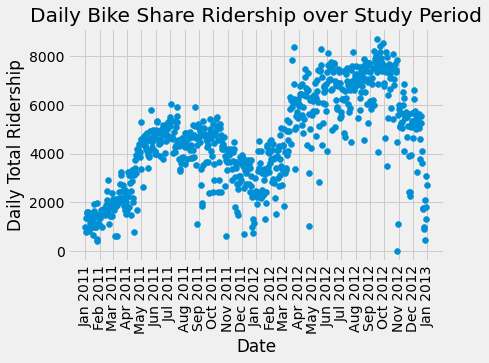

In [34]:
#The first thing that I feel would be good to know is the change of ridership over the year, so I'll go ahead and graph that.
grouped = df.groupby(['date']).agg('sum')
_ = plt.scatter(grouped.index, grouped['cnt'])
_ = plt.xticks(['2011-01-01', '2011-02-01', '2011-03-01', '2011-04-01', '2011-05-01', '2011-06-01', '2011-07-01', '2011-08-01', '2011-09-01', '2011-10-01', '2011-11-01', '2011-12-01', '2012-01-01', '2012-02-01', '2012-03-01', '2012-04-01', '2012-05-01', '2012-06-01', '2012-07-01', '2012-08-01', '2012-09-01', '2012-10-01', '2012-11-01', '2012-12-01', '2013-01-01'],
           rotation = 90, labels = ['Jan 2011', 'Feb 2011', 'Mar 2011', 'Apr 2011', 'May 2011', 'Jun 2011', 'Jul 2011', 'Aug 2011', 'Sep 2011', 'Oct 2011', 'Nov 2011', 'Dec 2011', 'Jan 2012', 'Feb 2012', 'Mar 2012', 'Apr 2012', 'May 2012', 'Jun 2012', 'Jul 2012', 'Aug 2012', 'Sep 2012', 'Oct 2012', 'Nov 2012', 'Dec 2012', 'Jan 2013'])
_ = plt.xlabel('Date')
_ = plt.ylabel('Daily Total Ridership')
_ = plt.title('Daily Bike Share Ridership over Study Period')
plt.show()

In [47]:
#Making a numerical weathersit column because I want to visualize that distribution.
back_to_num = []
for item in df['weathersit']:
    if item == 'Best':
        back_to_num.append(1)
    elif item == 'Okay':
        back_to_num.append(2)
    elif item == 'Bad':
        back_to_num.append(3)
    else:
        back_to_num.append(4)
df['weather_nums'] = back_to_num

array([[<AxesSubplot:title={'center':'hr'}>,
        <AxesSubplot:title={'center':'holiday'}>,
        <AxesSubplot:title={'center':'workingday'}>],
       [<AxesSubplot:title={'center':'temp'}>,
        <AxesSubplot:title={'center':'atemp'}>,
        <AxesSubplot:title={'center':'hum'}>],
       [<AxesSubplot:title={'center':'windspeed'}>,
        <AxesSubplot:title={'center':'casual'}>,
        <AxesSubplot:title={'center':'registered'}>],
       [<AxesSubplot:title={'center':'cnt'}>,
        <AxesSubplot:title={'center':'weather_nums'}>, <AxesSubplot:>]],
      dtype=object)

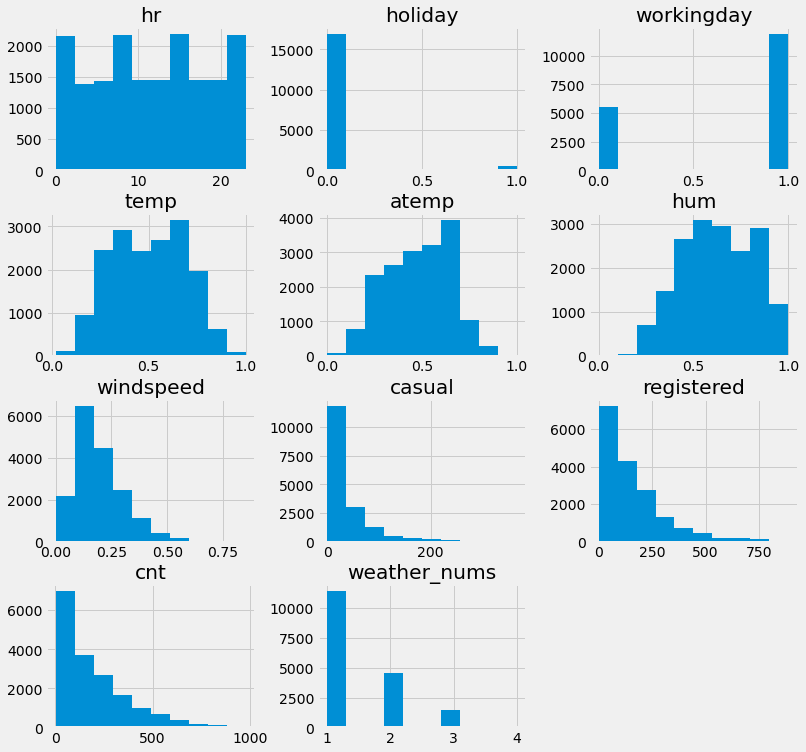

In [48]:
#Well, the results were in the realm of what I expected it to be. I just thought that would be a good graphic for later. 
#Now I want to see the histgrams for the things I don't know (season for example would just be in 4 equal bins so there is 
#not really a reason for me to take a look at it).
df.hist(figsize = (12, 12))

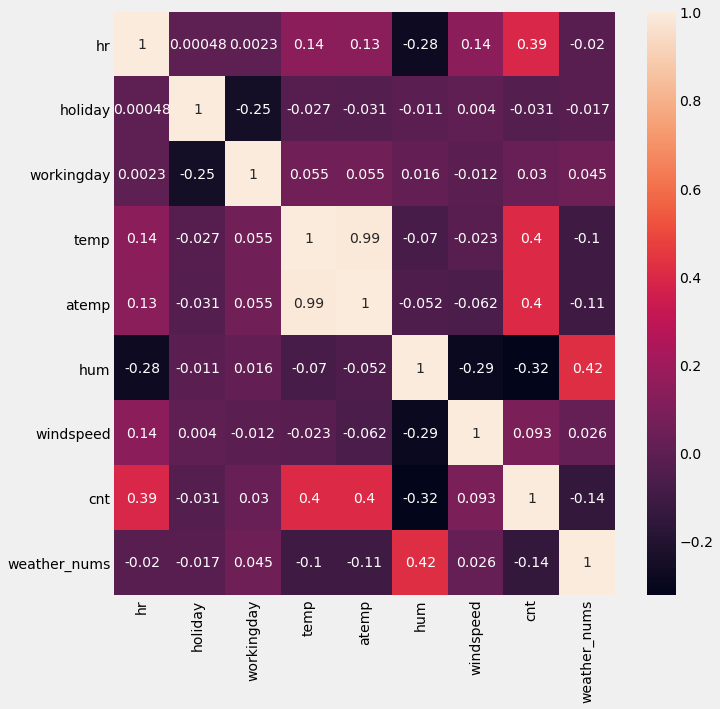

In [61]:
#One thing to note right off the bat is that hour looks wierd because of the binning and while it wasn't necessary to have
#a histogram for it, excluding it wasn't going to do much so I just didn't (it should have 24 equal buckets). It also 
#looks like there are fewer casual riders when compared to the registered riders reguardless of the day and that there are 
#more of riders (registered) at the higer end than compared to the casual riders. As the area of focus will be the total 
#count, the casual and registered columns would clearly correlate so there is not much of a need for these columns.
#Next I want to look at a correlation heat map to see how these columns relate.
_ = plt.figure(figsize = (10, 10))
_ = sns.heatmap(df.drop(columns = ['casual', 'registered']).corr(), annot=True)
plt.show()

So by the looks of it the total number of people who are using the program are mainly effected by the time of day and the temp of that given time with there being a little additional (albeit negative) effect from the humidity and quality of the weather. This graphic has made me consider reverting some of the changes I made in my inital wrangling step like getting rid of the month category because as seen in the earlier graph there is a change month to month, but I still feel like this should be enough correlation to make a model on. There are a couple of more things that I want to visualize before I am done, such as the average hourly change in ridership and the way that the enviromental changes effect things, so I'll go ahead and take a look at those.

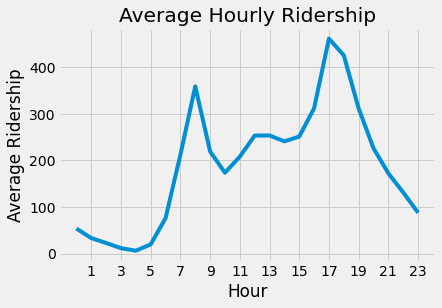

In [80]:
grouped_hr = df.groupby(['hr']).agg('mean')
_ = plt.plot(grouped_hr.index, grouped_hr['casual'])
_ = plt.xticks([1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23])
_ = plt.xlabel('Hour')
_ = plt.ylabel('Average Ridership')
_ = plt.title('Average Hourly Ridership')
plt.show()

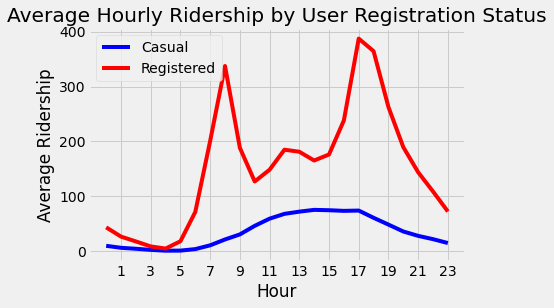

In [86]:
#It looks like a lot of people use this service around 8 am and 5 pm, which makes sense as that would be people using this 
#service for commuting. I now want to compare this with the casual and registered numbers as I think casual would be more 
#equal across the day when compared to the registered users.
_ = plt.plot(grouped_hr.index, grouped_hr['casual'], color = 'b', label = 'Casual')
_ = plt.plot(grouped_hr.index, grouped_hr['registered'], color = 'r', label = 'Registered')
_ = plt.legend()
_ = plt.xticks([1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23])
_ = plt.xlabel('Hour')
_ = plt.ylabel('Average Ridership')
_ = plt.title('Average Hourly Ridership by User Registration Status')
plt.show()

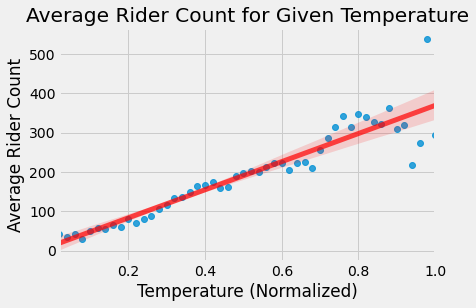

In [75]:
#Well, it looks like my guess was farily correct. Now lets take a look at how the temperature changes things.
grouped_temp = df.groupby(['temp']).agg('mean')
_ = sns.regplot(x = grouped_temp.index, y = grouped_temp['cnt'], line_kws={"color":"r","alpha":0.7,"lw":5})
_ = plt.xlabel('Temperature (Normalized)')
_ = plt.ylabel('Average Rider Count')
_ = plt.title('Average Rider Count for Given Temperature')

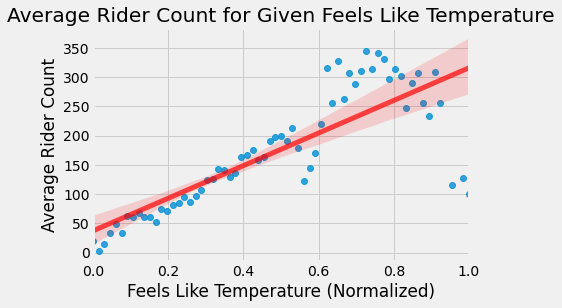

In [76]:
#I also want to see that in comparison to the Feels like temp (atemp), as they seem to be very close.
grouped_atemp = df.groupby(['atemp']).agg('mean')
_ = sns.regplot(x = grouped_atemp.index, y = grouped_atemp['cnt'], line_kws={"color":"r","alpha":0.7,"lw":5})
_ = plt.xlabel('Feels Like Temperature (Normalized)')
_ = plt.ylabel('Average Rider Count')
_ = plt.title('Average Rider Count for Given Feels Like Temperature')

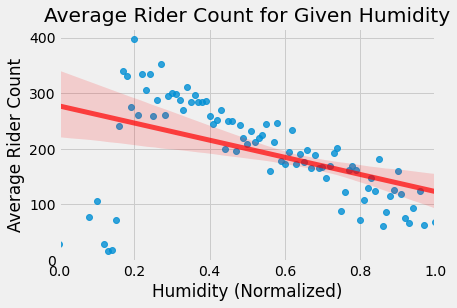

In [81]:
#Well it looks like the feels like temperatures are a tad more varied in either direction. There seems to be a jump in both 
#around the 0.8 mark with a dip past nine which might be because people don't want to go out biking when it is too hot. This
#is then leading me to think that a more linear model will not be super good a predicting rider count and some type of 
#ensemble regression might work better, but I am getting ahead of myself. Now I'll take a look at the humidity using similar
#means.
grouped_hum = df.groupby(['hum']).agg('mean')
_ = sns.regplot(x = grouped_hum.index, y = grouped_hum['cnt'], line_kws={"color":"r","alpha":0.7,"lw":5})
_ = plt.xlabel('Humidity (Normalized)')
_ = plt.ylabel('Average Rider Count')
_ = plt.title('Average Rider Count for Given Humidity')

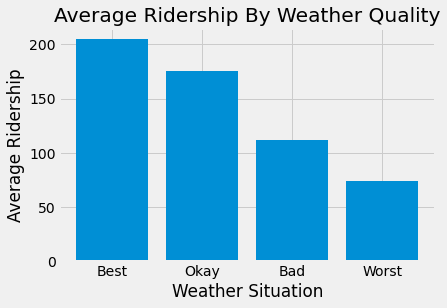

In [93]:
#And finally I want to take a look at how the quality of the weather affects the average ridership.
grouped_weather = df.groupby(['weather_nums']).agg('mean')
weather_types = list(df['weathersit'].unique())
pos = np.arange(len(weather_types))
_ = plt.bar(pos, grouped_weather['cnt'])
_ = plt.xticks(pos, weather_types)
_ = plt.xlabel('Weather Situation')
_ = plt.ylabel('Average Ridership')
_ = plt.title('Average Ridership By Weather Quality')
plt.show()

And with that I feel like I now have a good understanding of how the different features of this dataset interact with each other. While I am sure that I will have to create additional visualizations as they are needed, I do feel like I now know enough to move on to the next step in the process.